<Axes: xlabel='content', ylabel='frequency'>

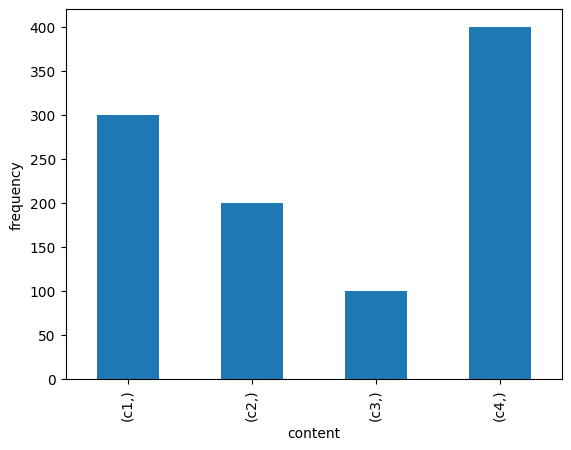

In [1]:
from matplotlib.pyplot import xlabel, ylabel
from scipy.special import label

from cdnsim.requests import Requests

requests = Requests(freqs=[300,200,100,400], index={'content': ['c1', 'c2', 'c3', 'c4']})
requests.plot.bar(ylabel='frequency')

<Axes: xlabel='content', ylabel='probability'>

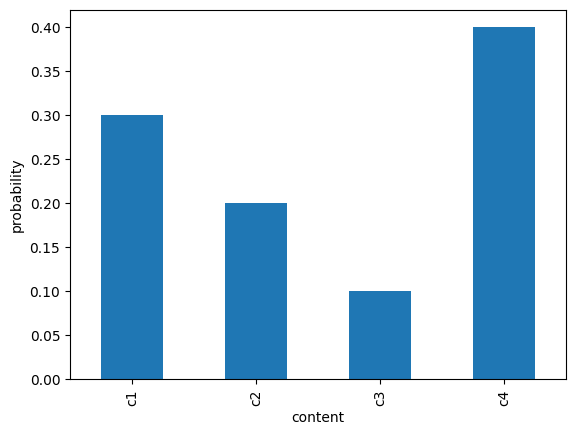

In [2]:
requests.pmf.plot.bar(xlabel='content', ylabel='probability')

<Axes: xlabel='content', ylabel='probability'>

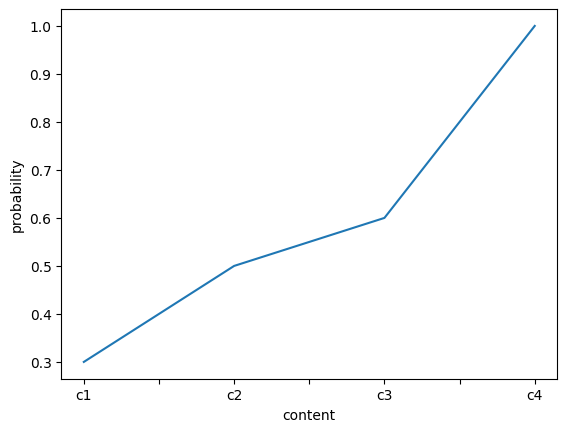

In [3]:
requests.cdf.plot(xlabel='content', ylabel='probability')

<Axes: xlabel='content', ylabel='probability'>

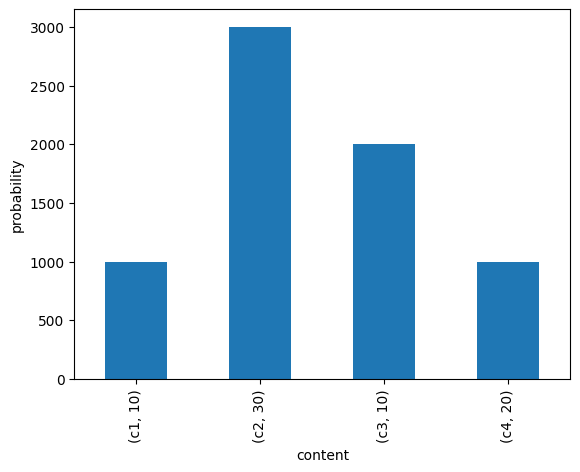

In [22]:
from cdnsim.requests import Requests
from typing import List, Hashable
import pandas as pd
class MyRequests(Requests):
    def __init__(self, freqs, contents:List[Hashable], sizes:List[Hashable]):
        super(MyRequests, self).__init__(freqs=freqs, index={'content': contents, 'size': sizes})
        
    @property
    def volume(self) ->pd.Series:
        return self.sort_values(ascending=False).reset_index().set_index(['content','request']).cumsum().rename(columns={'size':'volume'}).reset_index().set_index(['volume', 'content'])
        
        
myrequests = MyRequests([1000,3000,2000,1000], contents=['c1','c2','c3','c4'], sizes=[10,30,10,20])
myrequests.plot.bar(xlabel='content', ylabel='probability')

In [23]:
myrequests.volume

,,request
volume,content,
30,c2,3000
40,c3,2000
50,c1,1000
70,c4,1000


<Axes: xlabel='volume'>

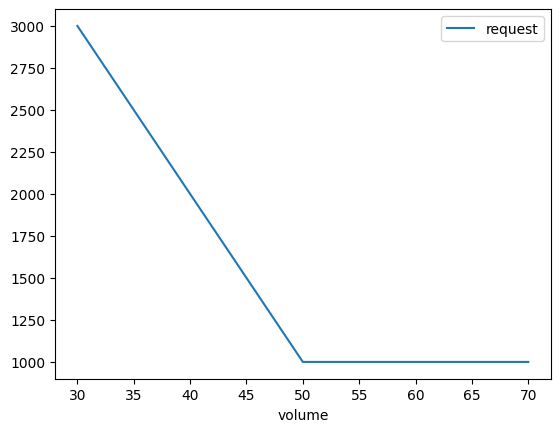

In [27]:
myrequests.volume.reset_index().plot.line(x='volume', y='request')

# Uniform

In [1]:
from cdnsim.requests import Requests

